In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Reading the data
df = pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


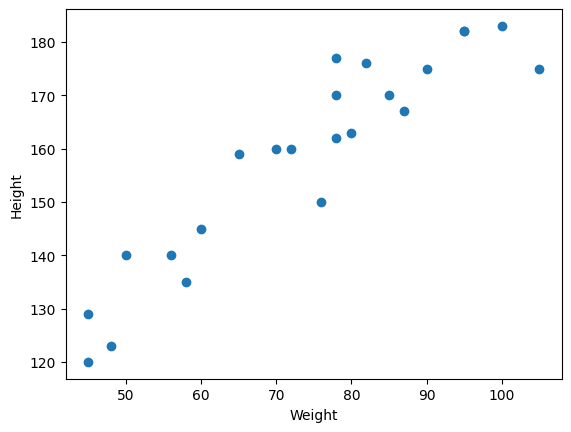

In [7]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [8]:
#Divide the data into X and y
X = df[['Weight']] #Independent feature
y = df['Height'] #Dependent feature

In [9]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [10]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [11]:
#Split into test and train data
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
X_train

,Weight
16,50
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45


In [15]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87


In [16]:
y_train

16    140
10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [17]:
y_test

20    129
17    159
3     145
13    183
19    167
Name: Height, dtype: int64

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [20]:
df.shape

(23, 2)

### Scaling and data standardization
#### We perform fit and transform only on training data, we perform only transform on test data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train

,Weight
16,50
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45


### Remember:
#### - Always perform scaling after you have done train test split
#### - y(target) should not be scaled
#### - Avoid scaling categorical features
#### - Scaling is optional and won't change the distribution of data

In [24]:
#Scaling training data:
X_train = scaler.fit_transform(X_train)
#For test data, use only tranform as it represents unknown data
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-1.4611864 ],
       [ 0.44730196],
       [-0.26838118],
       [-1.58046693],
       [ 0.08946039],
       [ 0.32802144],
       [ 0.92442405],
       [-0.98406431],
       [ 0.62622274],
       [-1.75938771],
       [ 0.20874091],
       [-0.14910065],
       [-1.10334484],
       [ 0.20874091],
       [ 1.22262536],
       [ 1.81902797],
       [ 1.22262536],
       [ 0.20874091]])

In [26]:
X_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

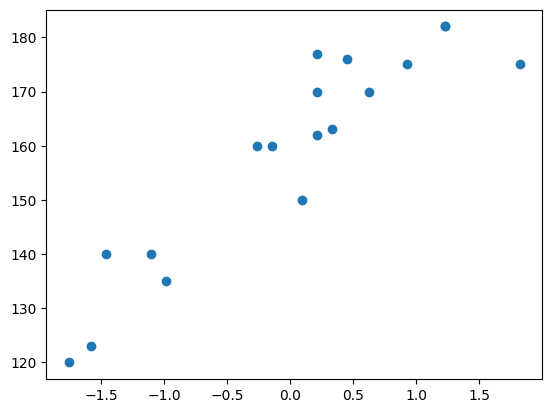

In [28]:
plt.scatter(X_train, y_train)

In [30]:
#Model Training
from sklearn.linear_model import LinearRegression

### Linear regression parameters:
#### - fit_intercept: The best fit line will have intercept, by default it is true.
#### - copy_x: copy the original X_train and then build the model, won't modify the original data, by default it is true
#### - n_jobs: No. of processors you want to use
#### - positive: If you want all the coefficients to be positive

In [32]:
lr = LinearRegression()

In [33]:
lr

LinearRegression()

In [34]:
#Training the model:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
print("The coefficient or slope of the model is: ", lr.coef_)
print("The intercept of model is ", lr.intercept_)

The coefficient or slope of the model is:  [17.73635106]
The intercept of model is  158.88888888888889


### Prediction on training data:
#### predicted height output = intercept + coef_ * (weight)
#### y_pred_train = 158.9 + 17.74 * (X_train)

### Prediction on testing data:
#### predicted height output = intercept + coef_ * (weight)
#### y_pred_test = 158.9 + 17.74 * (X_test)

In [36]:
# Prediction of training data
lr.predict(X_train)

array([132.97277388, 166.82239348, 154.12878613, 130.85717266,
       160.47558981, 164.70679226, 175.28479838, 141.43517878,
       169.99579532, 127.68377082, 162.59119103, 156.24438736,
       139.31957756, 162.59119103, 180.57380145, 191.15180757,
       180.57380145, 162.59119103])

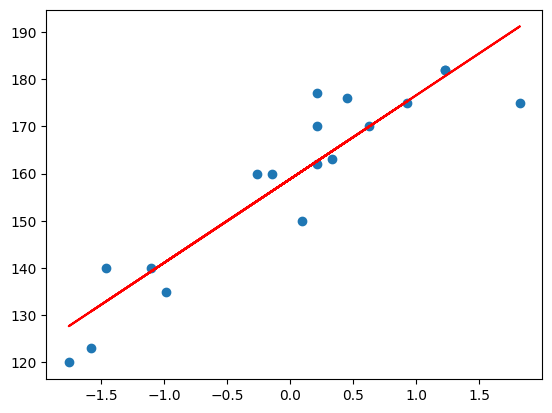

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), 'r')

In [38]:
y_pred_test = lr.predict(X_test)

In [39]:
y_pred_test, y_test

(array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
        172.11139655]),
 20    129
 17    159
 3     145
 13    183
 19    167
 Name: Height, dtype: int64)

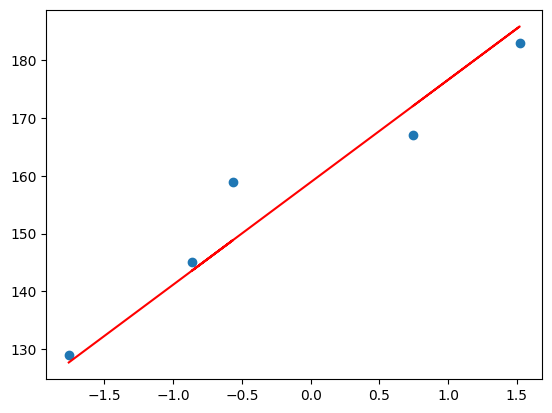

In [41]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), 'r')

# Performance Metrics

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

28.276946048811972 4.179973432576932 5.317607173232334


In [49]:
score = r2_score(y_test, y_pred_test)
score

0.9171832648523548

In [50]:
#Adjusted R2
#Using the formula:
1 - ((1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] -1))

0.8895776864698064

In [51]:
#X_test.shape[1] will get the number of columns

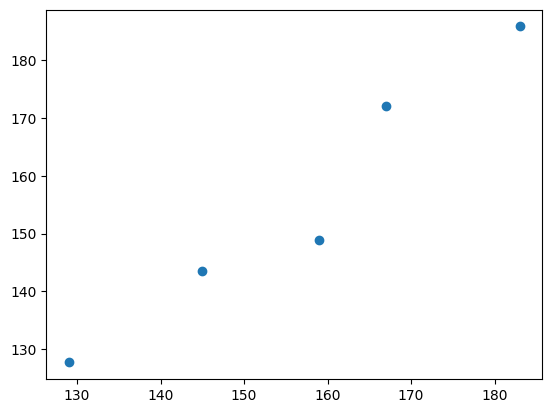

In [52]:
plt.scatter(y_test, y_pred_test)

In [53]:
# Error:

In [55]:
error = y_test - y_pred_test
error

20     1.316229
17    10.160217
3      1.449220
13    -2.862805
19    -5.111397
Name: Height, dtype: float64